## Import libraries

In [10]:
# TODO deal with non-existing directory (maybe let user add own directory)
# TODO add own direcotry

In [11]:
# To be able to read all files in a directory
import os
# Numpy :)
import numpy as np
# To read images as np arrays
from skimage.io import imread as imread
# To move images
import shutil
# To save np arrays; TODO: might not be nessecary
from PIL import Image
from skimage.color import rgb2gray
# To display images in Jupyter Notebooks
from skimage.io import imshow 

from skimage.feature import match_template

## Selecting the right images

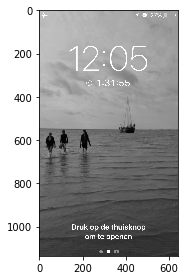

In [12]:
directory = 'iCloud Photos' #TODO maybe add input(directory see polynomial_fit.ipynbpolynomial_fit.ipynb)
filenames = [filename for filename in os.listdir(directory)]
try:
    filenames.remove('IMG_9984.PNG')
    # A perfect example of a picture we would like to recognice is IMG_9984.PNG
    A = rgb2gray(imread(f'{directory}/IMG_9984.PNG'))
    imshow(A)
except ValueError:
    print('Please add a rolmodel image called IMG_9984.PNG')
    raise

### Recognising background

In [13]:
# Training pics and test for false positives
train_test = ['0009/true', '0010/true', '0061/true', '9948/false', '0002/false']
for pic_info in train_test:
    num, tag = pic_info.split('/')
    try:
        train_pic = rgb2gray(imread(f'{directory}/IMG_{num}.PNG'))
        print(f'''The average result of the template matching is {np.average(match_template(train_pic, A))},
        This is supposed to be a {tag}.
        ''')
    except FileNotFoundError:
        pass
print('So for now lets assume a score of 0.92')

The average result of the template matching is 0.39561150120505484,
        This is supposed to be a false.
        
So for now lets assume a score of 0.92


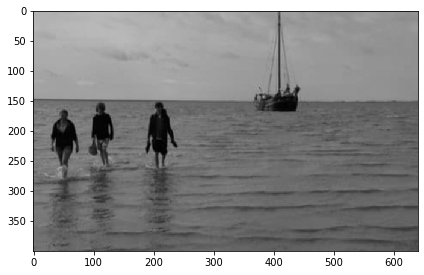

In [14]:
imshow(A[400:800])

In [15]:
for filename in filenames:
    try:
        frm = f'{directory}/{filename}'
        img_gray = rgb2gray(imread(frm))
        if img_gray.shape == A.shape:
            if np.sum(img_gray[400:800] - A[400:800]) == 0:
                new_p = Image.fromarray(img)
                to = f'/home/meester/Slaap analyse/sleep_analyser/filter_one/{filename}'
                shutil.move(frm,to)
    except FileNotFoundError:
        pass
        

### Recognising feature with template matching

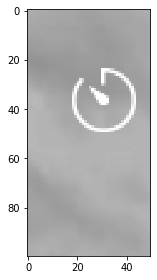

In [16]:
# A perfect example of a picture we would like to recognice is IMG_9984.PNG
A = rgb2gray(imread(f'{directory}/IMG_9984.PNG'))
imshow(A[300:400, 200:250])

In [17]:
directory = '/home/meester/Slaap analyse/sleep_analyser/'
for filename in filenames:
    try:
        frm = f'{directory}filter_one/{filename}'
        img_gray = rgb2gray(imread(frm))
        if img_gray.shape == A.shape:
            if np.average(match_template(A[300:700, 200:250], img_gray[300:700, 200:250])) > .99:
                new_p = Image.fromarray(img)
                to = f'{directory}filter_two/{filename}'
                shutil.move(frm,to)
    except FileNotFoundError:
        pass

# Classification

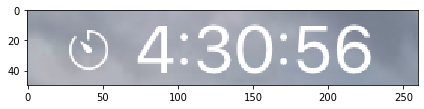

In [30]:
# find all the usefull images in /home/meester/Slaap analyse/sleep_analyser/filter_two/
filenames = [filename for filename in os.listdir(f'{directory}filter_two')]
A = imread(f'{directory}filter_two/IMG_1645.PNG')[310:360,190:450]
imshow(A)


In [42]:
y_hat_vec = [filename for filename in os.listdir(f'{directory}classification')]
#TODO deal with double numbers
# There's a maximum of 6 numbers
class_list = {y_hat:match_template(A, imread(f'{directory}classification/{y_hat}')) for y_hat in y_hat_vec}
# Lets assume we can achieve a result of .96 with template_matching if the number is the same, 
# but the background sligthly differs
classification = {}
for y_hat in y_hat_vec:
    # TODO [0] might fuck things up in the end
    result = match_template(A, imread(f'{directory}classification/{y_hat}'))[0]
    coordinates = []
    while np.max(result) > .92:
        ij = np.unravel_index(np.argmax(result), result.shape)
        x, y = ij[::-1]
        print(x,y)
        result[y,x]=0
        # only the x coordinates matter at this point
        coordinates.append(y)
    classification[y_hat.split('.')[0]] = coordinates
    

0 109
0 202
0 70
0 175


In [46]:
for clss in classification:
    if classification[clss] != []:
        print(clss, end="")

3645

In [50]:
np.min(classification.values())

dict_values([[109], [202], [], [], [], [], [], [70], [175]])